In [1]:
import numpy as np
from qiskit import execute, QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.providers.aer import *
from qiskit.tools.visualization import plot_histogram
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error

First we must create a circuit where we know what the result will be. Let's try an ideal singlet state qc.

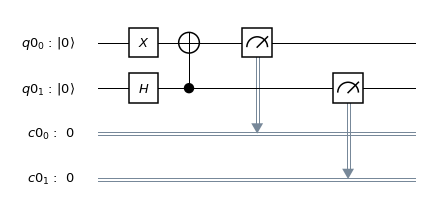

In [2]:
# prepare a singlet state
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)

qc.x(q[0])
qc.h(q[1])
qc.cx(q[1],q[0])
qc.measure(q,c)
qc.draw(output='mpl')

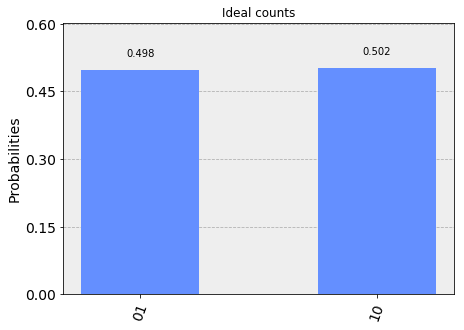

In [3]:
# perform an ideal simulation
simulator = Aer.get_backend('qasm_simulator')

result = execute(qc, simulator).result()
counts = result.get_counts(qc)
plot_histogram(counts, title='Ideal counts')

<p>In the ideal situation, there will be a 50% chance of getting a 01 or 10 and 0% chance of getting a 00 or 11.</p>
<p>Now let's try introducing a bit flip error. There are three probabilities to take into account in a bit flip error: probability of reset error, measurement error, and gate error.</p>
<p>First, let's test the reset error.</p>

NoiseModel:
  Basis gates: ['cx', 'id', 'u3']
  Instructions with noise: ['reset', 'cx']
  All-qubits errors: ['reset', 'cx']


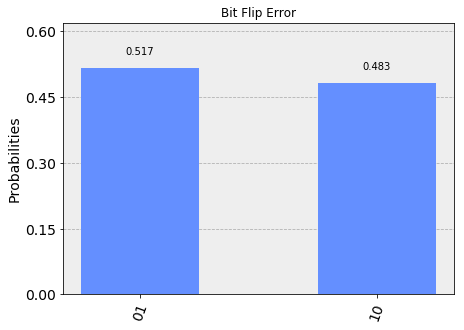

In [4]:
# bit flip error
# reset error
p_reset = 0.1
p_meas = 0
p_gate1 = 0

# QuantumError objects
error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
error_gate1 = pauli_error([('X',p_gate1), ('I', 1 - p_gate1)])
error_gate2 = error_gate1.tensor(error_gate1)

# add errors to noise model
noise_bit_flip = NoiseModel()
noise_bit_flip.add_all_qubit_quantum_error(error_reset, "reset")
noise_bit_flip.add_all_qubit_quantum_error(error_meas, "measure")
noise_bit_flip.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
noise_bit_flip.add_all_qubit_quantum_error(error_gate2, ["cx"])

print(noise_bit_flip)

# perform a noisy simulation
job = execute(qc, simulator,
              basis_gates=noise_bit_flip.basis_gates,
              noise_model=noise_bit_flip)
result_bit_flip = job.result()
counts_bit_flip = result_bit_flip.get_counts(0)

# plot noisy output
plot_histogram(counts_bit_flip, title="Bit Flip Error")

With a small reset error, nothing much happens to the circuit. Now let's try with a significantly higher probability.

NoiseModel:
  Basis gates: ['cx', 'id', 'u3']
  Instructions with noise: ['reset', 'cx']
  All-qubits errors: ['reset', 'cx']


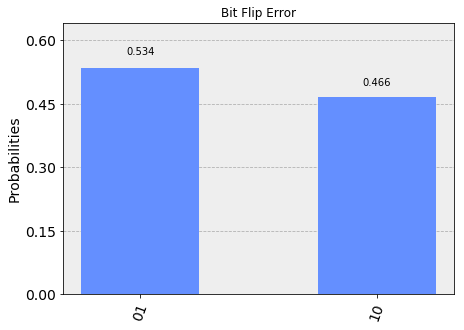

In [5]:
# bit flip error
# reset error
p_reset = 0.4
p_meas = 0
p_gate1 = 0

# QuantumError objects
error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
error_gate1 = pauli_error([('X',p_gate1), ('I', 1 - p_gate1)])
error_gate2 = error_gate1.tensor(error_gate1)

# add errors to noise model
noise_bit_flip = NoiseModel()
noise_bit_flip.add_all_qubit_quantum_error(error_reset, "reset")
noise_bit_flip.add_all_qubit_quantum_error(error_meas, "measure")
noise_bit_flip.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
noise_bit_flip.add_all_qubit_quantum_error(error_gate2, ["cx"])

print(noise_bit_flip)

# perform a noisy simulation
job = execute(qc, simulator,
              basis_gates=noise_bit_flip.basis_gates,
              noise_model=noise_bit_flip)
result_bit_flip = job.result()
counts_bit_flip = result_bit_flip.get_counts(0)

# plot noisy output
plot_histogram(counts_bit_flip, title="Bit Flip Error")

<p>Again, it is very similar to the ideal circuit. The reset error simply changes the probability that the qubit will start at 0. So, it will merely change the 01s to 10s and vice versa.</p>
<p>Now let's try changing the probability of a measurement error. If we start off small:</p>

NoiseModel:
  Basis gates: ['cx', 'id', 'u3']
  Instructions with noise: ['cx', 'measure']
  All-qubits errors: ['measure', 'cx']


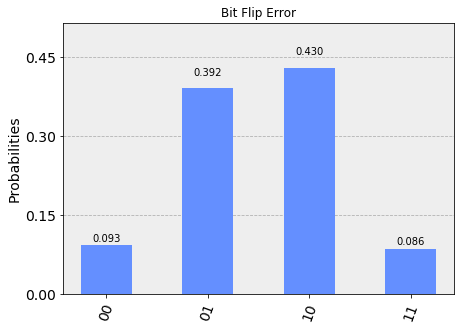

In [6]:
# bit flip error
# meas error
p_reset = 0
p_meas = 0.1
p_gate1 = 0

# QuantumError objects
error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
error_gate1 = pauli_error([('X',p_gate1), ('I', 1 - p_gate1)])
error_gate2 = error_gate1.tensor(error_gate1)

# add errors to noise model
noise_bit_flip = NoiseModel()
noise_bit_flip.add_all_qubit_quantum_error(error_reset, "reset")
noise_bit_flip.add_all_qubit_quantum_error(error_meas, "measure")
noise_bit_flip.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
noise_bit_flip.add_all_qubit_quantum_error(error_gate2, ["cx"])

print(noise_bit_flip)

# perform a noisy simulation
job = execute(qc, simulator,
              basis_gates=noise_bit_flip.basis_gates,
              noise_model=noise_bit_flip)
result_bit_flip = job.result()
counts_bit_flip = result_bit_flip.get_counts(0)

# plot noisy output
plot_histogram(counts_bit_flip, title="Bit Flip Error")

<p>Now we have introduced 00 and 11 as possible outputs. This is already much different from the ideal singlet state.</p>
<p>Let's increase the probability.</p>

NoiseModel:
  Basis gates: ['cx', 'id', 'u3']
  Instructions with noise: ['cx', 'measure']
  All-qubits errors: ['measure', 'cx']


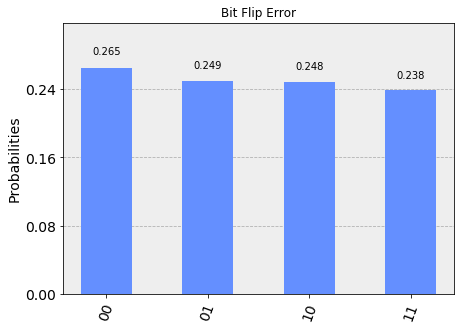

In [7]:
# bit flip error
# meas error
p_reset = 0
p_meas = 0.5
p_gate1 = 0

# QuantumError objects
error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
error_gate1 = pauli_error([('X',p_gate1), ('I', 1 - p_gate1)])
error_gate2 = error_gate1.tensor(error_gate1)

# add errors to noise model
noise_bit_flip = NoiseModel()
noise_bit_flip.add_all_qubit_quantum_error(error_reset, "reset")
noise_bit_flip.add_all_qubit_quantum_error(error_meas, "measure")
noise_bit_flip.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
noise_bit_flip.add_all_qubit_quantum_error(error_gate2, ["cx"])

print(noise_bit_flip)

# perform a noisy simulation
job = execute(qc, simulator,
              basis_gates=noise_bit_flip.basis_gates,
              noise_model=noise_bit_flip)
result_bit_flip = job.result()
counts_bit_flip = result_bit_flip.get_counts(0)

# plot noisy output
plot_histogram(counts_bit_flip, title="Bit Flip Error")

<p>Now it is equally likely to receive each combination.</p>
<p>Let's try increasing the probability one more time to a number above 0.5.</p>

In [ ]:
# bit flip error
# meas error
p_reset = 0
p_meas = 0.8
p_gate1 = 0

# QuantumError objects
error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
error_gate1 = pauli_error([('X',p_gate1), ('I', 1 - p_gate1)])
error_gate2 = error_gate1.tensor(error_gate1)

# add errors to noise model
noise_bit_flip = NoiseModel()
noise_bit_flip.add_all_qubit_quantum_error(error_reset, "reset")
noise_bit_flip.add_all_qubit_quantum_error(error_meas, "measure")
noise_bit_flip.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
noise_bit_flip.add_all_qubit_quantum_error(error_gate2, ["cx"])

print(noise_bit_flip)

# perform a noisy simulation
job = execute(qc, simulator,
              basis_gates=noise_bit_flip.basis_gates,
              noise_model=noise_bit_flip)
result_bit_flip = job.result()
counts_bit_flip = result_bit_flip.get_counts(0)

# plot noisy output
plot_histogram(counts_bit_flip, title="Bit Flip Error")

NoiseModel:
  Basis gates: ['cx', 'id', 'u3']
  Instructions with noise: ['cx', 'measure']
  All-qubits errors: ['measure', 'cx']


<p>Interestingly, we are back to the distribution we received when we had a very low probability. This is because if there is almost always a measurement error and the value flips, the 10s will flip to 01s with some exceptions. These exceptions are why we still have some probability of receiving a 00 or 11.</p>
<p>Now let's try a gate error with a small probability:</p>

In [ ]:
# bit flip error
# gate1 error
p_reset = 0
p_meas = 0
p_gate1 = 0.1

# QuantumError objects
error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
error_gate1 = pauli_error([('X',p_gate1), ('I', 1 - p_gate1)])
error_gate2 = error_gate1.tensor(error_gate1)

# add errors to noise model
noise_bit_flip = NoiseModel()
noise_bit_flip.add_all_qubit_quantum_error(error_reset, "reset")
noise_bit_flip.add_all_qubit_quantum_error(error_meas, "measure")
noise_bit_flip.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
noise_bit_flip.add_all_qubit_quantum_error(error_gate2, ["cx"])

print(noise_bit_flip)

# perform a noisy simulation
job = execute(qc, simulator,
              basis_gates=noise_bit_flip.basis_gates,
              noise_model=noise_bit_flip)
result_bit_flip = job.result()
counts_bit_flip = result_bit_flip.get_counts(0)

# plot noisy output
plot_histogram(counts_bit_flip, title="Bit Flip Error")

This graph seems very similar to the measurement error, the same will be found if we try a value around 0.5 too. There is about 25% chance for each possibility.

In [ ]:
# bit flip error
# gate1 error
p_reset = 0
p_meas = 0
p_gate1 = 0.5

# QuantumError objects
error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
error_gate1 = pauli_error([('X',p_gate1), ('I', 1 - p_gate1)])
error_gate2 = error_gate1.tensor(error_gate1)

# add errors to noise model
noise_bit_flip = NoiseModel()
noise_bit_flip.add_all_qubit_quantum_error(error_reset, "reset")
noise_bit_flip.add_all_qubit_quantum_error(error_meas, "measure")
noise_bit_flip.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
noise_bit_flip.add_all_qubit_quantum_error(error_gate2, ["cx"])

print(noise_bit_flip)

# perform a noisy simulation
job = execute(qc, simulator,
              basis_gates=noise_bit_flip.basis_gates,
              noise_model=noise_bit_flip)
result_bit_flip = job.result()
counts_bit_flip = result_bit_flip.get_counts(0)

# plot noisy output
plot_histogram(counts_bit_flip, title="Bit Flip Error")

However, what will happen if we try changing the probability to greater than 0.5?

In [ ]:
# bit flip error
# gate1 error
p_reset = 0
p_meas = 0
p_gate1 = 0.8

# QuantumError objects
error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
error_gate1 = pauli_error([('X',p_gate1), ('I', 1 - p_gate1)])
error_gate2 = error_gate1.tensor(error_gate1)

# add errors to noise model
noise_bit_flip = NoiseModel()
noise_bit_flip.add_all_qubit_quantum_error(error_reset, "reset")
noise_bit_flip.add_all_qubit_quantum_error(error_meas, "measure")
noise_bit_flip.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
noise_bit_flip.add_all_qubit_quantum_error(error_gate2, ["cx"])

print(noise_bit_flip)

# perform a noisy simulation
job = execute(qc, simulator,
              basis_gates=noise_bit_flip.basis_gates,
              noise_model=noise_bit_flip)
result_bit_flip = job.result()
counts_bit_flip = result_bit_flip.get_counts(0)

# plot noisy output
plot_histogram(counts_bit_flip, title="Bit Flip Error")

<p>Unlike the measurement error, by increasing the probability of a gate error to above 0.5 the distribution of 01s and 10s will only decrease. If we were to change the measurement error probability to 1, we would return to our ideal singlet state. However, if we change the gate error to 1, we would actually receive the opposite of a singlet state with 50% chance of 00 or 11 and 0% chance of 01 or 10.</p>
<p>This is only the case if we test individual aspects of the bit flip error. If we add in random values to all of the probabilities at once, each simulation will vary.</p>

In [ ]:
# bit flip error
# all errors
p_reset = 0.03
p_meas = 0.15
p_gate1 = 0.05

# QuantumError objects
error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
error_gate1 = pauli_error([('X',p_gate1), ('I', 1 - p_gate1)])
error_gate2 = error_gate1.tensor(error_gate1)

# add errors to noise model
noise_bit_flip = NoiseModel()
noise_bit_flip.add_all_qubit_quantum_error(error_reset, "reset")
noise_bit_flip.add_all_qubit_quantum_error(error_meas, "measure")
noise_bit_flip.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
noise_bit_flip.add_all_qubit_quantum_error(error_gate2, ["cx"])

print(noise_bit_flip)

# perform a noisy simulation
job = execute(qc, simulator,
              basis_gates=noise_bit_flip.basis_gates,
              noise_model=noise_bit_flip)
result_bit_flip = job.result()
counts_bit_flip = result_bit_flip.get_counts(0)

# plot noisy output
plot_histogram(counts_bit_flip, title="Bit Flip Error")